## Capture `display()` output

In [ ]:
#| default_exp utils.capture_display

In [ ]:
#| export
from IPython.core.displaypub import DisplayPublisher
from IPython.core.display_functions import _new_id
from IPython.display import display, clear_output, Javascript
from IPython import get_ipython
from typing import List
from PIL import Image
from collections import defaultdict
import warnings
import sys

In [ ]:
#| export
class PassthroughCapturer(DisplayPublisher):
    """A DisplayPublisher that stores AND displays!"""

    raw_outputs: List

    def __init__(self):
        self._publisher = None
        self.raw_outputs = []

    def publish(
        self, data, metadata=None, source=None, *, transient=None, update=False
    ):
        self.raw_outputs.append(
            {
                "data": data,
                "metadata": metadata,
                "transient": transient,
                "update": update,
            }
        )
        self._publisher.publish(data, metadata=metadata, transient=transient, update=update)

    def clear_output(self, wait=False):
        self.raw_outputs = []
        self._publisher.clear_output(wait)

    def start(self):
        ip = get_ipython()
        self._publisher = ip.display_pub
        ip.display_pub = self

        # print("starting passthrough: ", id(self._publisher), id(self))

    # Note: stop must be called from the cell that started the
    # passthrough, or from the associated post-cell callback
    def stop(self):
        ip = get_ipython()
        assert self._publisher
        ip.display_pub = self._publisher

    def get_outputs(self, with_js=False):
        coalesced_outputs = []
        display_id_map = defaultdict(list)

        outputs = self.raw_outputs
        if not with_js:
            outputs = [o for o in outputs if 'application/javascript' not in o['data']]

        # dicts are ordered in Python 3.7+
        for output in outputs:
            display_id = output['transient']['display_id'] if output['transient'] else _new_id()
            if not output['update']:
                display_id_map[display_id] += [output["data"]]
            else:
                display_id_map[display_id][-1] = output["data"]

        for display_id, output_list in display_id_map.items():
            coalesced_outputs += output_list

        return coalesced_outputs

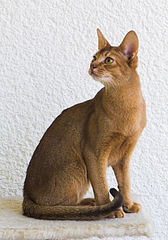

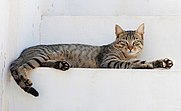

Hello print!


'Hello, world 3!'

# Hello, world!

<IPython.core.display.Latex object>

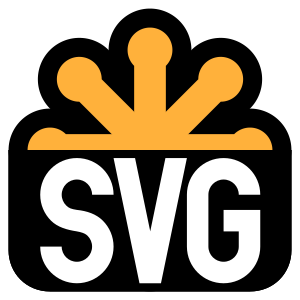

Hello!


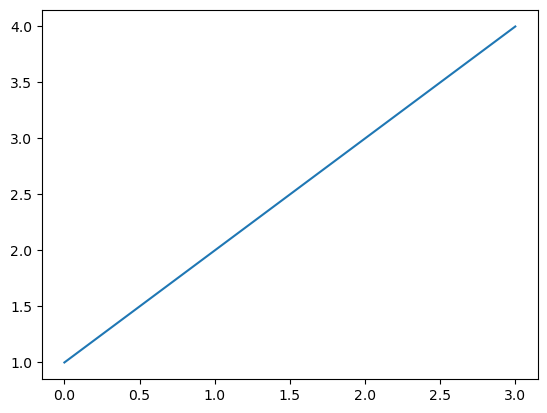

In [ ]:
from matplotlib import pyplot as plt
from IPython.display import display, HTML, Markdown, Latex, SVG
from pathlib import Path
capturer = PassthroughCapturer()
capturer.start()
image = Image.open("cat.jpg")
image2 = Image.open("cat2.jpg")
ttt = display(image2, display_id=True)
ttt.display(image2)
print("Hello print!")
# display(Javascript("alert('Hello, world!!')"))
ttt.update(image)
display("Hello, world 3!")
# # clear_output()

display(HTML("<h1>Hello, world!</h1>"))
display(Markdown("# Hello, world!"))
display(Latex(r"$\int_0^\infty x^2 dx$"))

display(SVG(Path("SVG_Logo.svg").read_text()))
# print("Hello, world!")
# display("Hello, world!")
# display("Hello, world 2!")

# ttt = display("Hello, world 3!", display_id=True)
# ttt.update("Hello, world 4!")

# ttt = display("Hello, world 5!", display_id=True)
# ttt.display("Hello, world 6!")

print("Hello!")

fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4])
display(fig)
plt.close()

capturer.stop()

In [ ]:
capturer.get_outputs()

[{'text/plain': '<PIL.PngImagePlugin.PngImageFile image mode=RGB size=168x240>',
  'image/png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xa8\x00\x00\x00\xf0\x08\x02\x00\x00\x00\x1b\xf4\xb8y\x00\x01\x00\x00IDATx\x01L\xfdw\xd4\xa7\xd9}\x18\xf6\xfdz\xefo\x7f\xa7\xee\xcelG\x07\x08\x91"E\xcb\x92"\xdb\x12\x15\xdbG<\x91\xe5\xe4\xe4$\x7f$\xf1\xb1\x93#[\xb6%\xc7J\x14\xcbfD\xc9\xa6\x14US\xb4$\x92V\xb3x\xc4\x06\x88\x04\x05\x90\x04\x01\x10\xc0\x02 \xdab\xeb\xec\xee\xf4\x99\xb7\xf7_\xef\xf9\xdc\xe7\x0e\xc6\xba\xfb\xee3\xf7w\x9f\xef\xfd\xf6\xdb\xcb\x93\xbe{\xf7n&\x93\xa9T*\xb3\xd9,\x97\xcb\x15\x8b\xc5^\xaf7\x9dN\x0b\x85\xd2r\xb9|\xf4\xe8\xd1\xf5\xeb\xd7\xb3\xd9\xec\xc5\xc5\xc5x<n6\x9b\xe3q\x7f\xb1XH\x01\x00~\xb1H\xcd\xe7s\x90\x12\xcb\xe5\xb2\xa7\x9f\xa5R)\x95Ju\xbb\xdd\xd1h\x94\xcb\xa5\x06\x83\x01\xf8z\xbd\x8e\x10H\xf1t:].\xd7\x0f\x0f\x0f\x11\x92\x0e^\xfap8D\xa5P(\xac\xaf\xaf\xc7\x08\x8a\x18\xf3J\xc6\\.#\x97\x148\'I\xa8V\xab\x9b\x9b\x9b\xc3\xe1\xf8\xce\x9d\xf7+\x95\x12>\xf7\xf7\x0f{\xbd\xc1